In [1]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [2]:
"""
------------------------------------------------------------------------------
Load GeoJson files
------------------------------------------------------------------------------
"""

admin_areas = gpd.read_file("../data/raw/Prognoseräume.json")

df_streets_gender = gpd.read_file("../data/raw/ways.geojson")

In [3]:
"""
------------------------------------------------------------------------------
Data exploration
------------------------------------------------------------------------------
"""

df_streets_gender.shape

(53842, 6)

In [4]:
df_streets_gender["gender"].value_counts()

gender
M     15544
F      1612
+        12
FX        3
Name: count, dtype: int64

In [5]:
#subset female/male

fm = ["F", "M"]

df_streets_fm = df_streets_gender[df_streets_gender["gender"].isin(fm)]

df_streets_fm.head()

,name,wikidata,gender,source,details,geometry
0,Ursula-Goetze-Straße,None,F,wikidata,"{ ""wikidata"": ""Q108809"", ""person"": true, ""gend...","LINESTRING (13.53136 52.49263, 13.53136 52.492..."
6,Michael-Brückner-Straße,None,M,wikidata,"{ ""wikidata"": ""Q1927076"", ""person"": true, ""gen...","LINESTRING (13.51476 52.45303, 13.51528 52.45267)"
8,Jafféstraße,Q22287975,M,wikidata,"{ ""wikidata"": ""Q817940"", ""person"": true, ""gend...","LINESTRING (13.26152 52.50771, 13.26165 52.507..."
14,Alte Jafféstraße,None,M,wikidata,"{ ""wikidata"": ""Q817940"", ""person"": true, ""gend...","LINESTRING (13.27354 52.4999, 13.27338 52.4999..."
19,Hosemannstraße,Q89752160,M,wikidata,"{ ""wikidata"": ""Q1640970"", ""person"": true, ""gen...","LINESTRING (13.43953 52.54775, 13.43948 52.547..."


In [6]:
df_streets_fm.shape

(17156, 6)

In [7]:
df_streets_fm.dtypes

name          object
wikidata      object
gender        object
source        object
details       object
geometry    geometry
dtype: object

In [8]:
df_streets_fm.isna().sum()

name            0
wikidata    12156
gender          0
source          0
details         0
geometry        0
dtype: int64

In [9]:
admin_areas.head()

,id,pgr_id,pgr_name,bez,finhalt,stand,geometry
0,c_lor_pgr_2021.0370,0370,Südlicher Prenzlauer Berg,03 - Pankow,3.031117e+06,01.01.2021,"MULTIPOLYGON (((13.41975 52.52555, 13.42016 52..."
1,c_lor_pgr_2021.0220,0220,Kreuzberg Süd,02 - Friedrichshain-Kreuzberg,4.746309e+06,01.01.2021,"MULTIPOLYGON (((13.40772 52.48875, 13.40789 52..."
2,c_lor_pgr_2021.0760,0760,Marienfelde / Lichtenrade,07 - Tempelhof-Schöneberg,1.919254e+07,01.01.2021,"MULTIPOLYGON (((13.35912 52.4199, 13.35902 52...."
3,c_lor_pgr_2021.0520,0520,Wilhelmstadt / Staaken,05 - Spandau,2.301526e+07,01.01.2021,"MULTIPOLYGON (((13.15724 52.50162, 13.15726 52..."
4,c_lor_pgr_2021.0330,0330,Nördliches Weißensee,03 - Pankow,2.222540e+07,01.12.2021,"MULTIPOLYGON (((13.43357 52.58232, 13.43362 52..."


In [10]:
#Check for empty or invalid geometries
print(f"Empty geometry in df_streets_fm: {len(df_streets_fm[df_streets_fm.is_empty])}")
print(f"Invalid geometry in df_streets_fm: {len(df_streets_fm[~df_streets_fm.is_valid])}")

Empty geometry in df_streets_fm: 0
Invalid geometry in df_streets_fm: 0


In [11]:
"""
------------------------------------------------------------------------------
CRS
------------------------------------------------------------------------------
"""

df_streets_fm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
#Ensure both GeoDataFrames have the same CRS 
if admin_areas.crs != df_streets_fm.crs:
    df_Baeume = df_streets_fm.to_crs(admin_areas.crs)

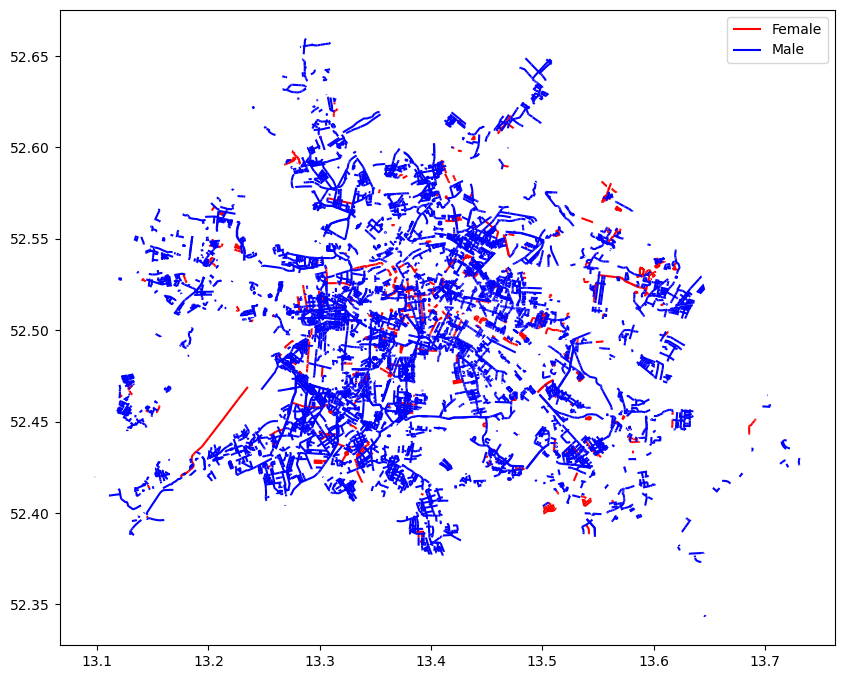

In [13]:
#Plot female and male street names
fig, ax = plt.subplots(figsize=(10, 10))

df_streets_fm[df_streets_fm["gender"] == "F"].plot(ax=ax, color="red", label="Female") 
df_streets_fm[df_streets_fm["gender"] == "M"].plot(ax=ax, color="blue", label="Male")

plt.legend()
plt.show()

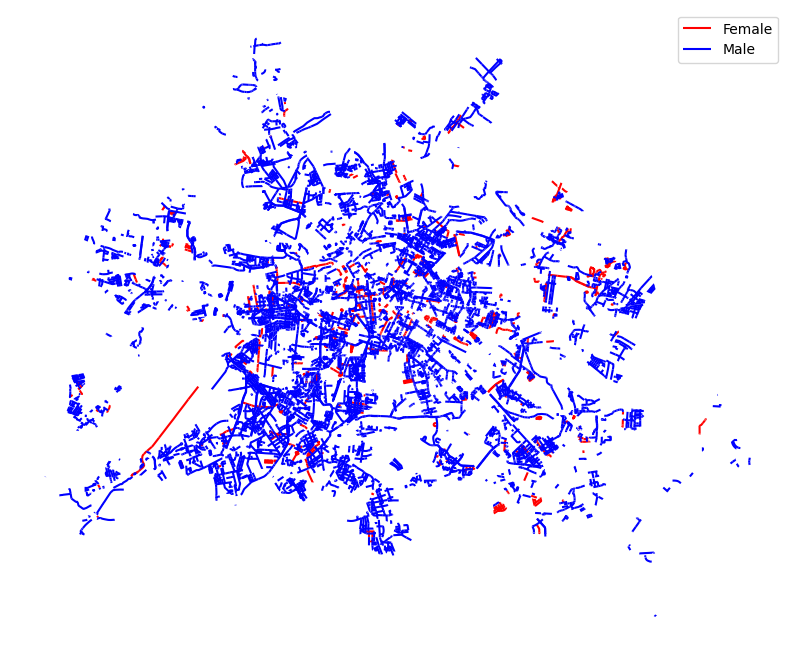

In [27]:
# #female/male streets SVG
# fig, ax = plt.subplots(figsize=(10, 10))

# df_streets_fm[df_streets_fm["gender"] == "F"].plot(ax=ax, color="red", label="Female") 
# df_streets_fm[df_streets_fm["gender"] == "M"].plot(ax=ax, color="blue", label="Male")
# plt.legend()
# ax.set_axis_off()

# fig.savefig("intersections_f_m_streets_1.svg", format="svg")

In [28]:
df_streets_fm["gender"].value_counts()

gender
M    15544
F     1612
Name: count, dtype: int64

In [29]:
"""
------------------------------------------------------------------------------
Functions: 
female street names
male street names
------------------------------------------------------------------------------
"""

def calculate_f_streets(admin_area, df_streets_fm):
    #find intersections between the street dataframe and admin areas
    intersections = df_streets_fm[df_streets_fm.intersects(admin_area.geometry)]
    
    #Count the unique female street names in the intersections
    unique_f_streets = intersections[intersections["gender"] == "F"]["name"].nunique()
    
    print(f"Admin Area: {admin_area["pgr_name"]}, Unique_f_streets: {unique_f_streets}")
    
    return unique_f_streets


def calculate_m_streets(admin_area, df_streets_fm):
    #find intersections between the street dataframe and admin areas
    intersections = df_streets_fm[df_streets_fm.intersects(admin_area.geometry)]
    
    #Count the unique female street names in the intersections
    unique_m_streets = intersections[intersections["gender"] == "M"]["name"].nunique()
    
    print(f"Admin Area: {admin_area["pgr_name"]}, Unique_m_streets: {unique_m_streets}")
    
    return unique_m_streets


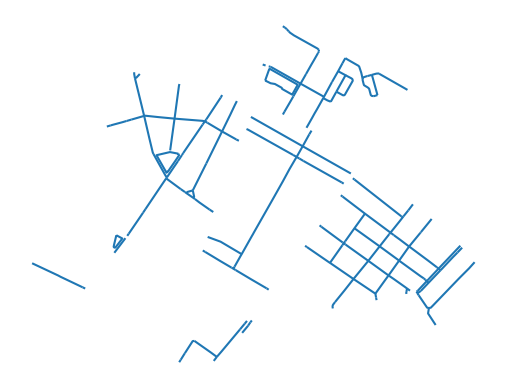

In [30]:
# #example intersection geojson
# intersections_f_streets_1 = df_streets_fm[df_streets_fm.intersects(admin_areas.iloc[0].geometry)]

# intersections_f_streets_1.to_file("intersections_f_streets_adminArea1.geojson")

# #Transform geojson into svg
# fig, ax = plt.subplots()
# intersections_f_streets_1.plot(ax=ax)
# ax.set_axis_off()

# fig.savefig("intersections_f_streets_1.svg", format="svg")

In [31]:
#Test
intersections = df_streets_fm[df_streets_fm.intersects(admin_areas.iloc[0].geometry)]
intersections[intersections["gender"] == "F"]["name"].nunique()

7

In [32]:
intersections[intersections["gender"] == "M"]["name"].nunique()

25

In [33]:
df_streets_fm.geometry.head()

0     LINESTRING (13.53136 52.49263, 13.53136 52.492...
6     LINESTRING (13.51476 52.45303, 13.51528 52.45267)
8     LINESTRING (13.26152 52.50771, 13.26165 52.507...
14    LINESTRING (13.27354 52.4999, 13.27338 52.4999...
19    LINESTRING (13.43953 52.54775, 13.43948 52.547...
Name: geometry, dtype: geometry

In [34]:
#Calculation of unique_f_streets and unique_m_streets for each administrative area
admin_areas["unique_f_streets"] = admin_areas.apply(
    lambda row: calculate_f_streets(row, df_streets_fm), axis=1
)

admin_areas["unique_m_streets"] = admin_areas.apply(
    lambda row: calculate_m_streets(row, df_streets_fm), axis=1
)

#Display the results as a DataFrame
admin_areas[["pgr_id", "pgr_name", "unique_f_streets", "unique_m_streets"]].head(20)

Admin Area: Südlicher Prenzlauer Berg, Unique_f_streets: 7
Admin Area: Kreuzberg Süd, Unique_f_streets: 4
Admin Area: Marienfelde / Lichtenrade, Unique_f_streets: 5
Admin Area: Wilhelmstadt / Staaken, Unique_f_streets: 3
Admin Area: Nördliches Weißensee, Unique_f_streets: 4
Admin Area: Tempelhof, Unique_f_streets: 7
Admin Area: Lichtenberg Nord, Unique_f_streets: 3
Admin Area: Lichtenberg Mitte, Unique_f_streets: 9
Admin Area: Hellersdorf, Unique_f_streets: 16
Admin Area: Buch, Unique_f_streets: 0
Admin Area: Hohenschönhausen Nord, Unique_f_streets: 5
Admin Area: Kaulsdorf/Mahlsdorf, Unique_f_streets: 3
Admin Area: Treptow-Köpenick 1, Unique_f_streets: 3
Admin Area: Tegel, Unique_f_streets: 5
Admin Area: Mariendorf, Unique_f_streets: 0
Admin Area: Friedrichshain Ost, Unique_f_streets: 7
Admin Area: Nördlicher Prenzlauer Berg, Unique_f_streets: 9
Admin Area: Charlottenburg Nord, Unique_f_streets: 4
Admin Area: Lankwitz/Lichterfelde Ost, Unique_f_streets: 13
Admin Area: Schöneberg Nord, 

,pgr_id,pgr_name,unique_f_streets,unique_m_streets
0,0370,Südlicher Prenzlauer Berg,7,25
1,0220,Kreuzberg Süd,4,68
2,0760,Marienfelde / Lichtenrade,5,132
3,0520,Wilhelmstadt / Staaken,3,88
4,0330,Nördliches Weißensee,4,23
5,0740,Tempelhof,7,96
6,1130,Lichtenberg Nord,3,50
7,1140,Lichtenberg Mitte,9,39
8,1020,Hellersdorf,16,30
9,0310,Buch,0,18


In [35]:
#Merge dataframes

df_streets = admin_areas[["pgr_id", "pgr_name", "unique_f_streets", "unique_m_streets"]]

df_streets.head()

,pgr_id,pgr_name,unique_f_streets,unique_m_streets
0,0370,Südlicher Prenzlauer Berg,7,25
1,0220,Kreuzberg Süd,4,68
2,0760,Marienfelde / Lichtenrade,5,132
3,0520,Wilhelmstadt / Staaken,3,88
4,0330,Nördliches Weißensee,4,23


In [36]:
#Total street count and female streets in percent
df_streets["unique_streets_count"] = df_streets["unique_f_streets"] + df_streets["unique_m_streets"]
df_streets["f_percent"] = (df_streets["unique_f_streets"] / df_streets["unique_streets_count"]).round(3) *100

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_20806/57088691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streets["unique_streets_count"] = df_streets["unique_f_streets"] + df_streets["unique_m_streets"]
/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_20806/57088691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_streets["f_percent"] = (df_streets["unique_f_streets"] / df_streets["unique_streets_count"]).round(3) *100


In [37]:
df_streets.head()

,pgr_id,pgr_name,unique_f_streets,unique_m_streets,unique_streets_count,f_percent
0,0370,Südlicher Prenzlauer Berg,7,25,32,21.9
1,0220,Kreuzberg Süd,4,68,72,5.6
2,0760,Marienfelde / Lichtenrade,5,132,137,3.6
3,0520,Wilhelmstadt / Staaken,3,88,91,3.3
4,0330,Nördliches Weißensee,4,23,27,14.8


In [38]:
df_streets["f_percent"].min()

0.0

In [39]:
df_streets["f_percent"].max()

34.8

In [40]:
#CSV
df_streets.to_csv("F_streets_byAdminarea.csv", index = False)